# 5.4a、某城市連續14年月度嬰兒出生率序列
## data_hw5.2.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.tsa.arima.model as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

## statsmodels自帶的畫ACF的函數

In [2]:
def drawer(input):
    plt.figure(figsize=(10,8))
    series = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    acf=plt.subplot2grid((2,2),(1,0))
    pacf=plt.subplot2grid((2,2),(1,1))
    series.plot(input, '*-')
    plot_acf(input,ax=acf)
    plot_pacf(input,ax=pacf)
    plt.show()
    plt.close()

## statsmodels自帶的LB test

In [3]:
def purerandtest(input):
    LB,Pvalue=acorr_ljungbox(input,lags=None,boxpierce=False)
    for pointer in range(len(Pvalue)):
        Pvalue[pointer] = round(Pvalue[pointer],3)
    LB_purerand=pd.DataFrame(np.c_[LB,Pvalue],columns=['LB','Pvalue'])
    LB_purerand['lags']=range(1,len(LB)+1)
    print('----time series: LB pure randomness test----')
    print(LB_purerand)

## 对比图

In [12]:
def drawcompare(series, prediction):
    plt.plot(series, "*-", label='observe')
    plt.plot(prediction, label='fittes')
    plt.legend()
    plt.show()
    plt.close()

## 差分函数

In [4]:
def caculatediff(diff, step, input):
    if(step!=0):
        input = input[step:] - input[:-step]
    if (diff == 0):
        return input
    input = input[1:] - input[:-1]
    return caculatediff(diff - 1, 0, input)

## 開始分析

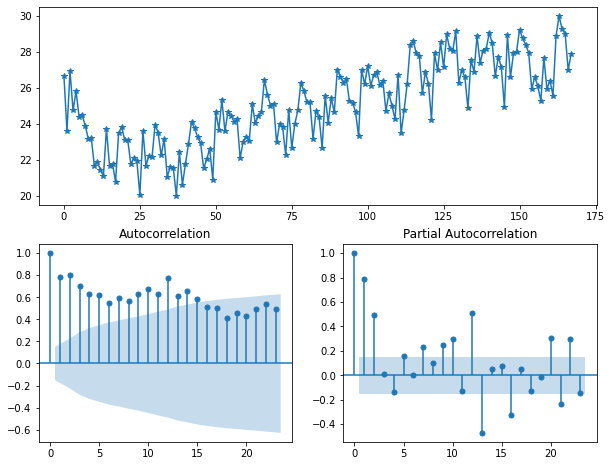

In [5]:
filename = "data_hw5.2.csv"
series = pd.read_csv(filename, header=None)
series.iloc[:, 0] = series.iloc[:, 0].astype("float")
series = series.values[:, 0]
drawer(series)

## 12步&1階差分

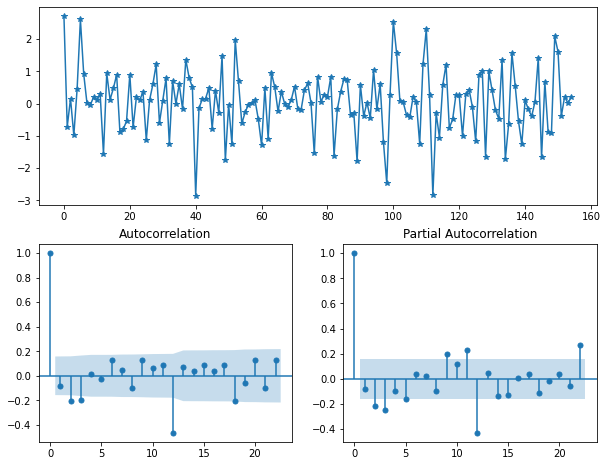

----time series: LB pure randomness test----
            LB  Pvalue  lags
0     1.113963   0.291     1
1     7.805166   0.020     2
2    13.795047   0.003     3
3    13.843401   0.008     4
4    13.962657   0.016     5
5    16.735351   0.010     6
6    17.083755   0.017     7
7    18.842016   0.016     8
8    21.579285   0.010     9
9    22.290730   0.014    10
10   23.491085   0.015    11
11   60.273590   0.000    12
12   61.108806   0.000    13
13   61.409247   0.000    14
14   62.799285   0.000    15
15   63.118996   0.000    16
16   64.415866   0.000    17
17   71.791097   0.000    18
18   72.491197   0.000    19
19   75.633883   0.000    20
20   77.301127   0.000    21
21   80.514797   0.000    22
22   80.900031   0.000    23
23   81.933661   0.000    24
24   84.206248   0.000    25
25   86.388278   0.000    26
26   86.406311   0.000    27
27   86.407641   0.000    28
28   86.660112   0.000    29
29   87.924166   0.000    30
30   87.946916   0.000    31
31   88.550831   0.000    3

D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [6]:
diff1step12 = caculatediff(1, 12, series)
drawer(diff1step12)
purerandtest(diff1step12)

## ARIMA(p,d,q)建模參數估計

In [9]:
model=smt.ARIMA(series,order=(1,1,1),seasonal_order=(0,1,0,12)).fit() #trend=n,c,t,ct
print('----fitting summary----')
print(model.summary())

----fitting summary----
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  168
Model:             ARIMA(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -205.976
Date:                           Thu, 25 Nov 2021   AIC                            417.952
Time:                                   23:02:42   BIC                            427.083
Sample:                                        0   HQIC                           421.661
                                           - 168                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6212      0.119      5.216      0.000       0.388       0.855
ma.L1         -0.89

D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


## 殘差白噪聲檢驗/模型顯著性檢驗

In [10]:
resid=model.resid
print('\n----residual pure randomness test')
purerandtest(resid)


----residual pure randomness test
----time series: LB pure randomness test----
           LB  Pvalue  lags
0    2.659574   0.103     1
1    4.869393   0.088     2
2    6.064793   0.109     3
3    6.689598   0.153     4
4    6.848432   0.232     5
5    6.891575   0.331     6
6    6.891580   0.440     7
7    7.540935   0.480     8
8    7.888546   0.545     9
9    9.507813   0.485    10
10   9.944744   0.535    11
11  42.482576   0.000    12
12  43.695590   0.000    13
13  43.798638   0.000    14
14  43.822908   0.000    15
15  43.926875   0.000    16
16  43.930678   0.000    17
17  44.291587   0.001    18
18  44.509002   0.001    19
19  44.853594   0.001    20
20  44.859613   0.002    21
21  45.304196   0.002    22
22  45.346271   0.004    23
23  45.428504   0.005    24
24  45.759882   0.007    25
25  46.276629   0.008    26
26  46.351207   0.012    27
27  46.391172   0.016    28
28  46.461415   0.021    29
29  46.468011   0.028    30
30  46.477597   0.037    31
31  46.697350   0.045   

D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


## 擬合

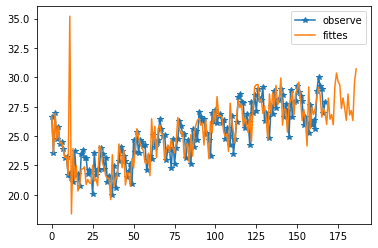

In [13]:
prediction = model.get_prediction(start=0,end=len(series)-1+20,dynamic=False)
prediction = prediction.summary_frame(alpha=0.05).iloc[:,[0]]
prediction = prediction.values[:, 0]
drawcompare(series,prediction[1:])